## Rainfall Prediction - Weather Forecasting

## Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [3]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [4]:

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## check duplicates:

In [7]:
df.duplicated().sum()

1663

In [9]:

#remove duplicates

df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [15]:
#after removing duplicates
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [16]:
df.shape

(6762, 23)

## check null values:

In [18]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

as we can see that so many null values are there

<AxesSubplot:>

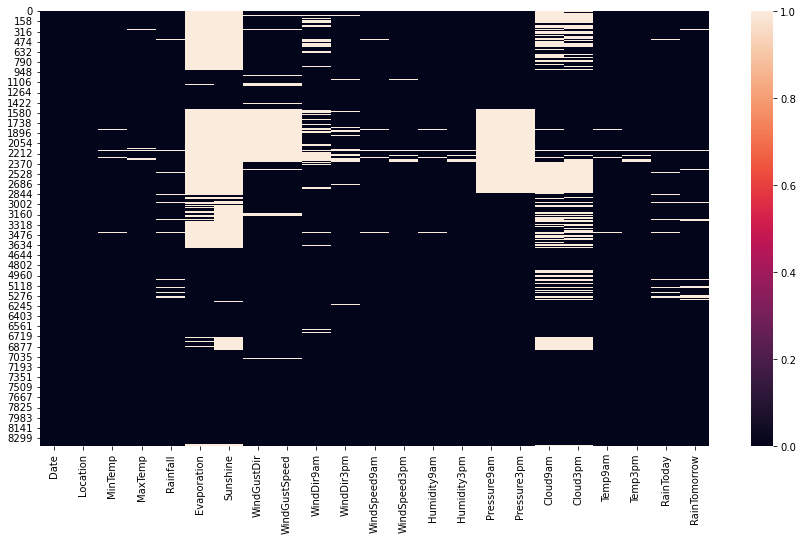

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

most of the column shows the null values

In [21]:
#checking the column type
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

## correlation:

In [22]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.732224,0.096920,0.375746,0.057486,0.256240,0.169892,0.190401,-0.154486,0.068195,-0.485326,-0.484495,0.115356,0.057884,0.892822,0.701350
MaxTemp,0.732224,1.000000,-0.088644,0.474207,0.510316,0.173965,0.056789,0.116570,-0.426922,-0.433479,-0.366396,-0.448191,-0.297298,-0.292260,0.870736,0.979928
Rainfall,0.096920,-0.088644,1.000000,-0.001197,-0.235263,0.114417,0.052404,0.022983,0.230801,0.245858,-0.081876,-0.038247,0.205457,0.170861,-0.004216,-0.093096
Evaporation,0.375746,0.474207,-0.001197,1.000000,0.373516,0.249237,0.218191,0.162563,-0.334393,-0.260803,-0.248391,-0.266568,-0.101460,-0.170163,0.439616,0.462652
Sunshine,0.057486,0.510316,-0.235263,0.373516,1.000000,0.010680,0.012575,0.073606,-0.539589,-0.633070,-0.002736,-0.075870,-0.706986,-0.724897,0.342593,0.534644
WindGustSpeed,0.256240,0.173965,0.114417,0.249237,0.010680,1.000000,0.655641,0.709757,-0.287769,-0.102429,-0.420929,-0.388184,0.016911,0.078269,0.233317,0.136675
WindSpeed9am,0.169892,0.056789,0.052404,0.218191,0.012575,0.655641,1.000000,0.557242,-0.373532,-0.122646,-0.204942,-0.170066,-0.028898,0.025913,0.152244,0.042140
WindSpeed3pm,0.190401,0.116570,0.022983,0.162563,0.073606,0.709757,0.557242,1.000000,-0.261588,-0.100918,-0.296594,-0.249080,-0.016140,-0.024400,0.209339,0.093101
Humidity9am,-0.154486,-0.426922,0.230801,-0.334393,-0.539589,-0.287769,-0.373532,-0.261588,1.000000,0.642584,0.152013,0.192590,0.488182,0.378324,-0.407592,-0.419833
Humidity3pm,0.068195,-0.433479,0.245858,-0.260803,-0.633070,-0.102429,-0.122646,-0.100918,0.642584,1.000000,-0.006960,0.067398,0.515071,0.539586,-0.137481,-0.500518


<AxesSubplot:>

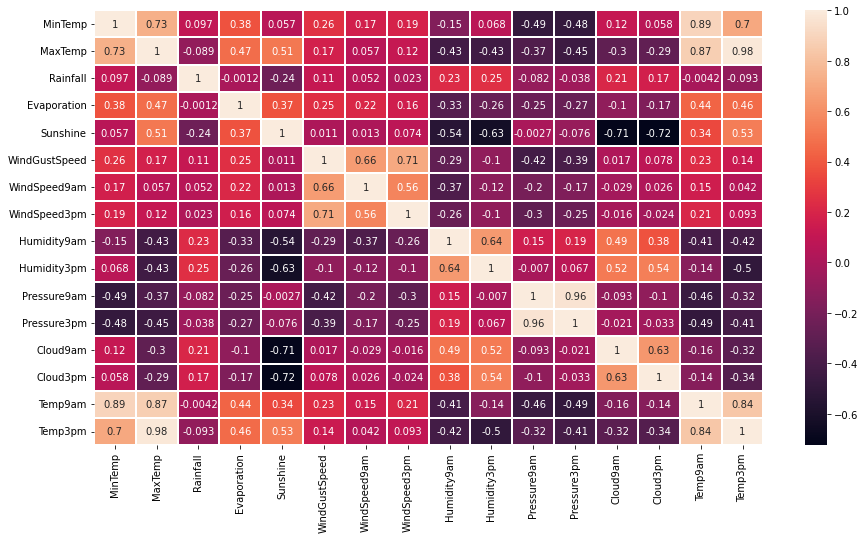

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

as we can see that some column are least correlated

## descriptive statestics:

In [25]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000
50%,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


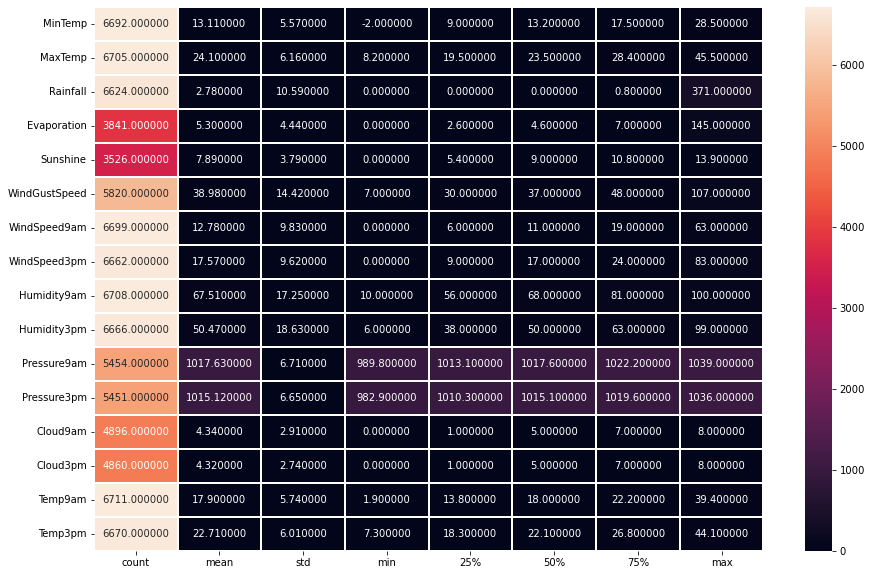

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe().transpose(),2),linewidth=2,annot=True,fmt="f")

plt.savefig('heatmap.png')
plt.show()

4 columns (Pressure9am,Pressure3pm,Cloud9am,Cloud3pm) shows the high mean and std

## imputaion:

In [38]:
# filling the null value 
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [39]:
#Filling the missing values for continuous variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [40]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [41]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [42]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,,,,,,,,,,,,,,,,
Adelaide,10.980000,10.980000,1.434735,5.095359,7.890896,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.336806,4.320988,15.861951,20.189756
Albury,10.062123,10.062123,2.128800,5.302395,7.890896,33.918117,8.245145,14.294061,72.604190,47.062845,1017.581477,1014.981477,5.147625,4.728749,14.555347,21.673539
Brisbane,15.368928,15.368928,3.109673,4.875479,7.926644,26.441872,6.031088,9.682456,66.474105,54.179507,1018.123661,1015.031330,3.694301,3.898655,20.685656,23.977059
CoffsHarbour,13.704107,13.704107,5.434665,3.698749,7.332570,38.815634,15.385539,20.509235,66.314239,60.647246,1018.587647,1016.097021,3.816694,4.115617,19.611620,21.746168
Darwin,21.324800,21.324800,2.735200,6.349210,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000
Melbourne,12.443280,12.443280,2.311971,4.529963,6.419718,45.769228,19.709001,22.697904,66.754015,51.244062,1017.845623,1016.075117,5.102724,5.082858,15.333163,19.952785
Newcastle,12.931789,12.931789,3.028616,5.302395,7.890896,38.977663,5.636495,12.646130,73.736393,55.832898,1017.626311,1015.119923,4.051695,4.330029,17.440604,22.352102
Penrith,11.279668,11.279668,2.361287,5.302395,7.890896,31.410742,5.626556,11.024896,72.863071,45.481328,1017.626311,1015.119923,4.336806,4.320988,15.533195,22.135270
PerthAirport,13.172674,13.172674,1.916279,5.784387,8.797976,44.776188,18.043189,21.353821,58.833887,42.131229,1017.082497,1014.548173,3.449336,3.559801,19.330648,24.472176


## Encoding:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6762 non-null   float64
 3   MaxTemp        6762 non-null   float64
 4   Rainfall       6762 non-null   float64
 5   Evaporation    6762 non-null   float64
 6   Sunshine       6762 non-null   float64
 7   WindGustDir    6762 non-null   object 
 8   WindGustSpeed  6762 non-null   float64
 9   WindDir9am     6762 non-null   object 
 10  WindDir3pm     6762 non-null   object 
 11  WindSpeed9am   6762 non-null   float64
 12  WindSpeed3pm   6762 non-null   float64
 13  Humidity9am    6762 non-null   float64
 14  Humidity3pm    6762 non-null   float64
 15  Pressure9am    6762 non-null   float64
 16  Pressure3pm    6762 non-null   float64
 17  Cloud9am       6762 non-null   float64
 18  Cloud3pm

In [44]:
#change categorical column
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [45]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [46]:
df['Date']= label_encoder.fit_transform(df['Date'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,13.4,0.6,5.302395,7.890896,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1,1,7.4,7.4,0.0,5.302395,7.890896,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2,1,12.9,12.9,0.0,5.302395,7.890896,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,3,1,9.2,9.2,0.0,5.302395,7.890896,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0


## visualisation:

### uvivariate:

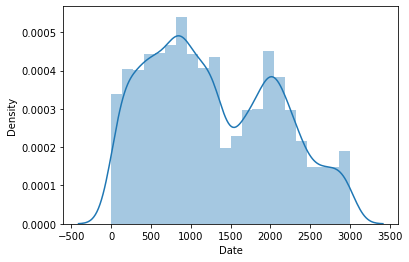

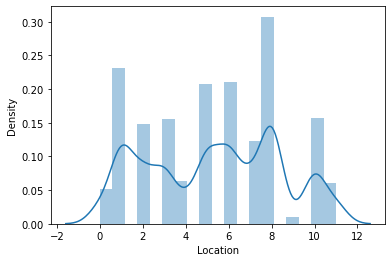

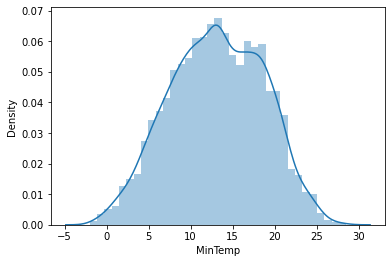

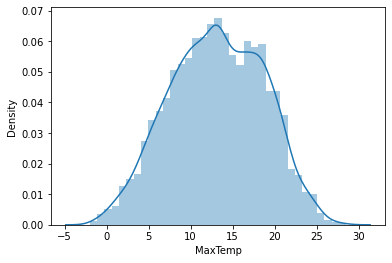

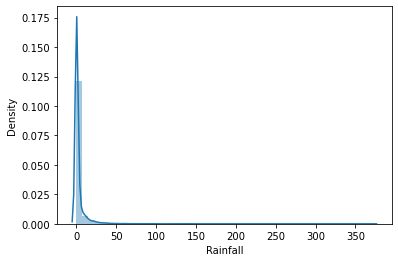

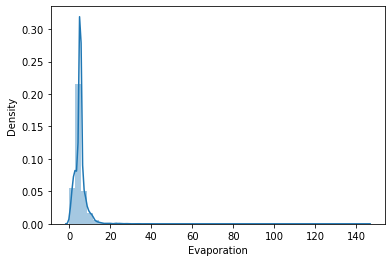

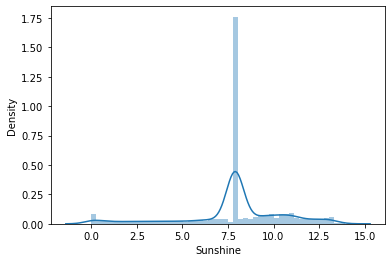

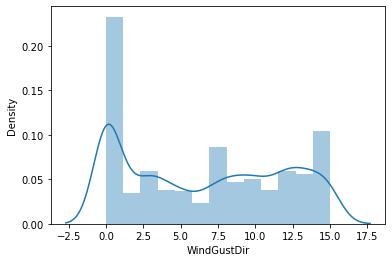

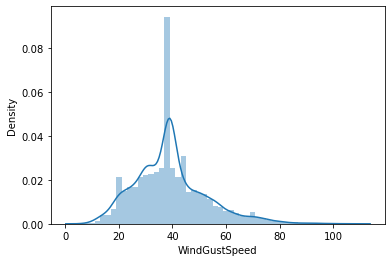

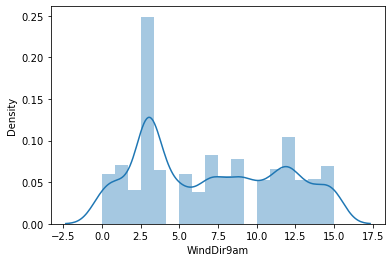

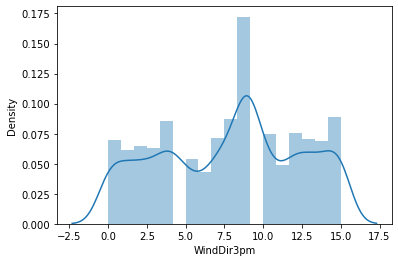

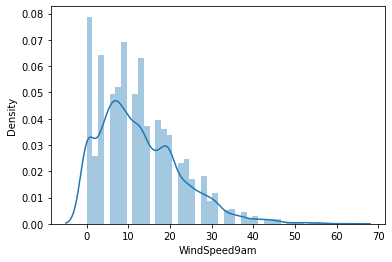

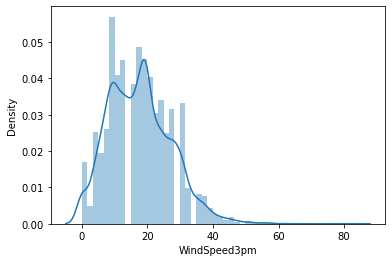

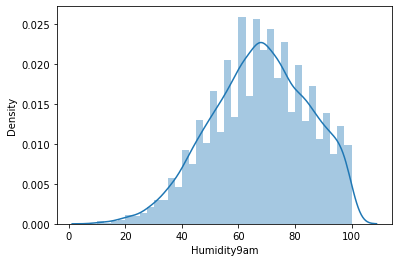

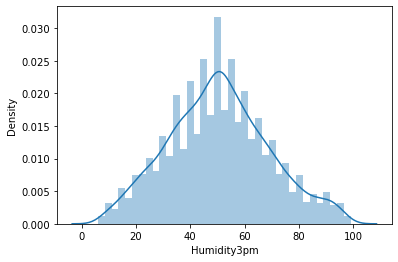

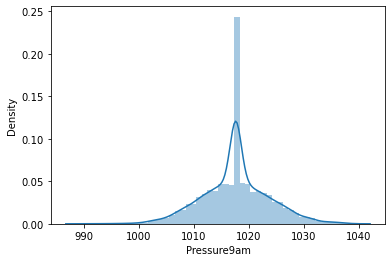

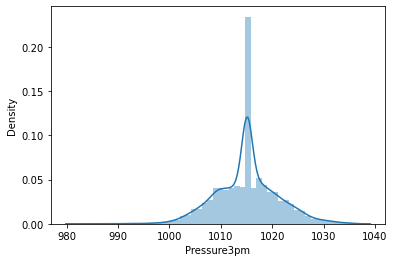

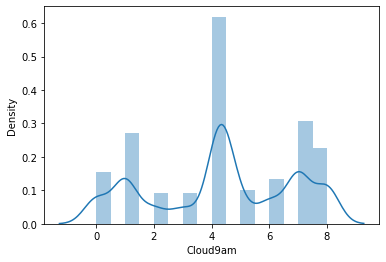

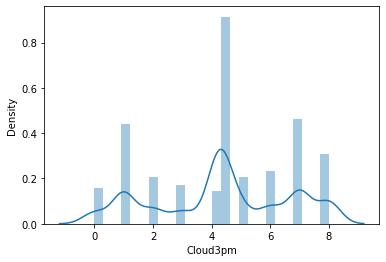

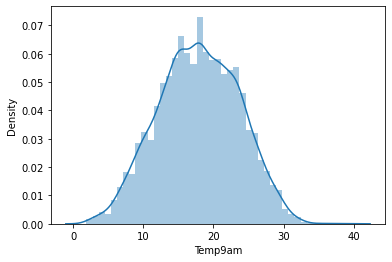

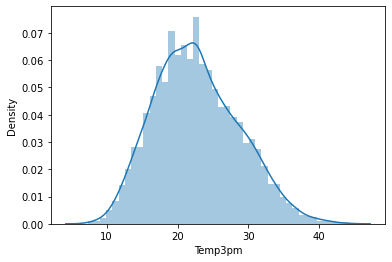

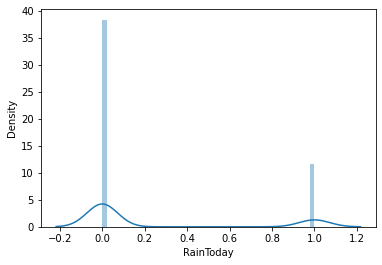

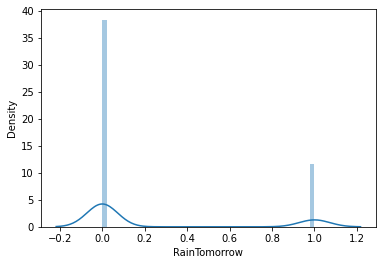

In [47]:
# visualize 
for i in df.columns[0:23]:
    plt.figure()
    sns.distplot( df[i])


data is not balanced

In [49]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

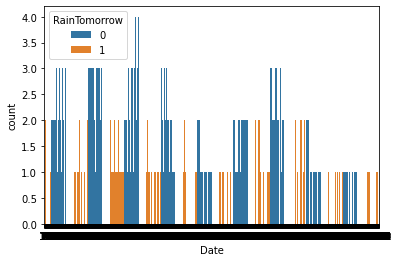

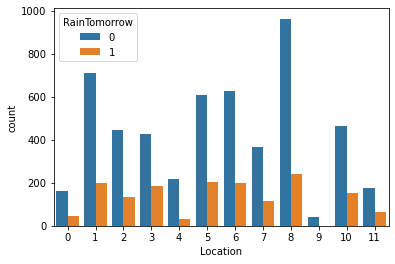

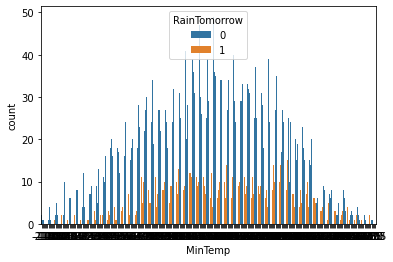

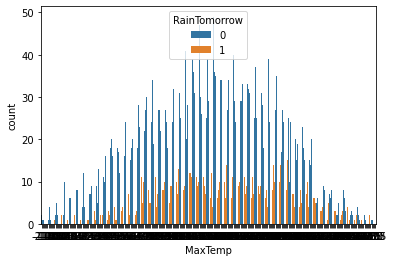

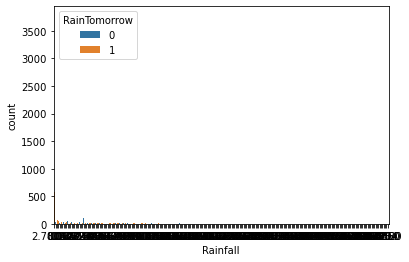

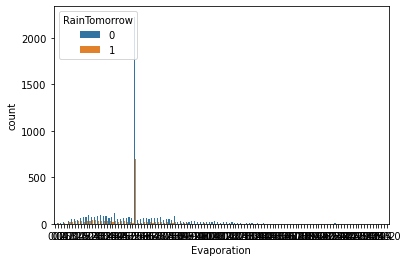

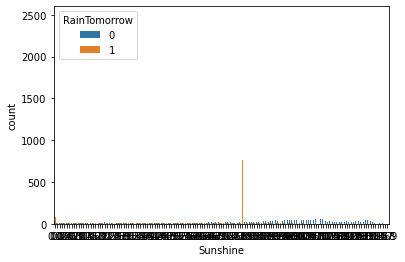

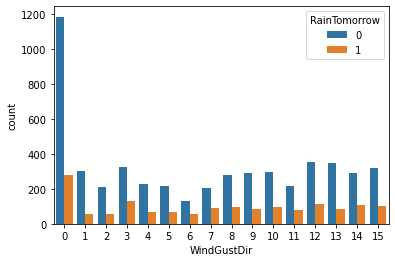

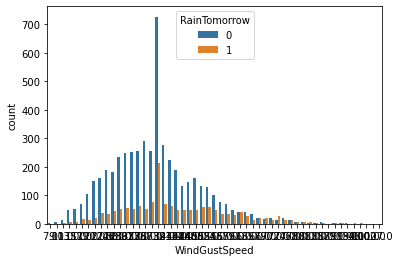

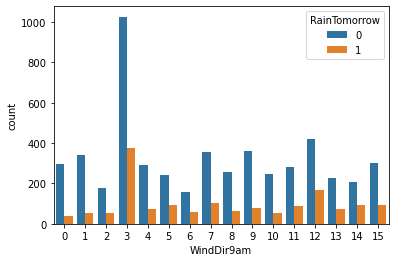

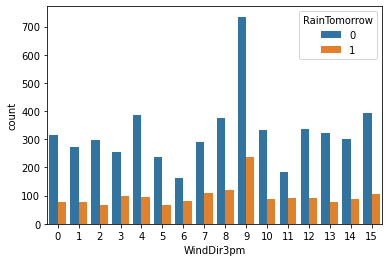

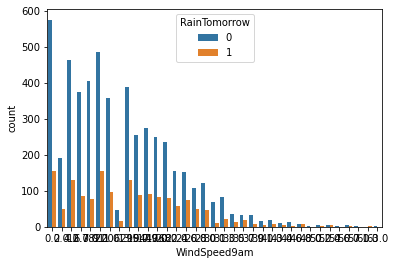

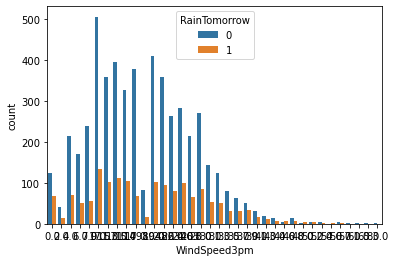

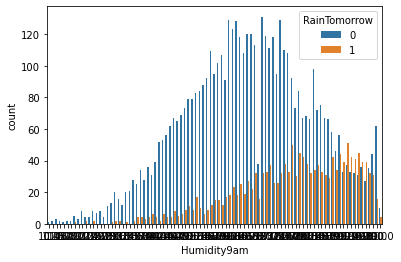

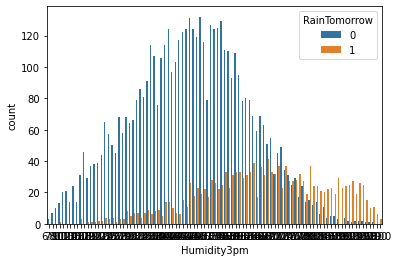

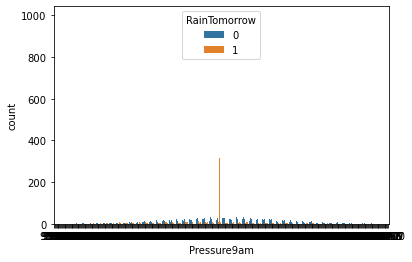

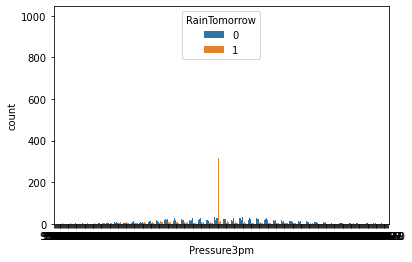

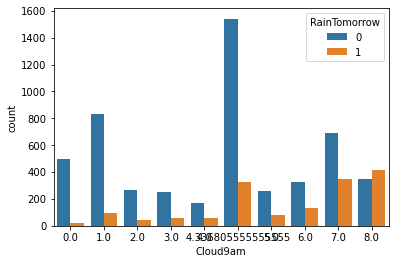

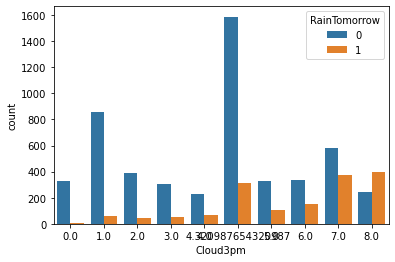

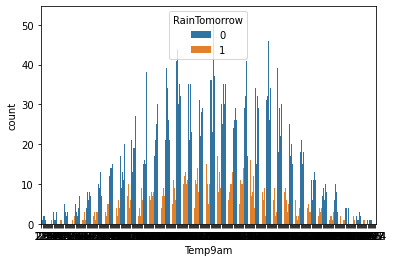

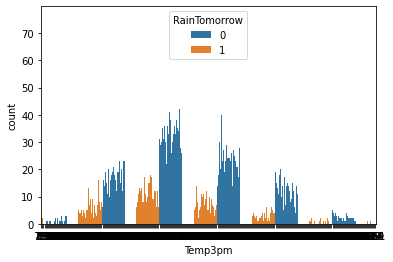

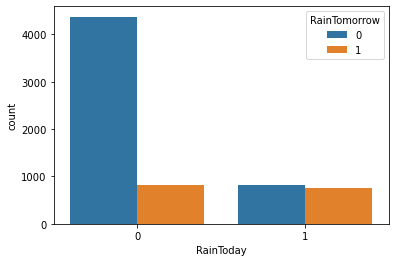

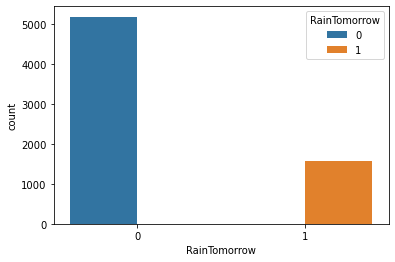

In [59]:
for i, predictor in enumerate(df):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='RainTomorrow')

## set the variable:

In [65]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

### transform the data:

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

### splitting the data:

In [85]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.20, random_state=10)

## model building:

In [71]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [73]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
print(accuracy_score(y_test,y_pred))

0.8240946045824095


In [75]:
print(confusion_matrix(y_test,y_pred))


[[962  72]
 [166 153]]


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1034
           1       0.68      0.48      0.56       319

    accuracy                           0.82      1353
   macro avg       0.77      0.70      0.73      1353
weighted avg       0.81      0.82      0.81      1353



In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[RD_model,DT_model,SV_model,KNR_model,ADA_model,GB_model ]

In [78]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 82.48337028824834
Confusion Matrix of  RidgeClassifier()  is 
 [[978  56]
 [181 138]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1034
           1       0.71      0.43      0.54       319

    accuracy                           0.82      1353
   macro avg       0.78      0.69      0.71      1353
weighted avg       0.81      0.82      0.81      1353

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 77.75314116777533
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[882 152]
 [149 170]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1034
           1       0.53      0.53      0.53       319

    accuracy                           0.78      1353
   macro avg       0.69      0.69      0.69      1353
weighted avg       0.78      0.78      0.78      1353

*****************************

## cross validation:

In [79]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 82.48337028824834
cross Validation accuracy score of  RidgeClassifier()  is  82.84513485263953
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 77.75314116777533
cross Validation accuracy score of  DecisionTreeClassifier()  is  67.02241785731466
**************************************************
Accuracy_Score of  SVC() is 82.85291943828528
cross Validation accuracy score of  SVC()  is  81.09983512422538
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 81.1529933481153
cross Validation accuracy score of  KNeighborsClassifier()  is  78.02482539349332
**************************************************
Accuracy_Score of  AdaBoostClassifier() is 83.00073909830007
cross Validation accuracy score of  AdaBoostClassifier()  is  78.45250746751684
**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 82.70509977827

## hyperparameter using Gridsearch:

In [90]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
x_train,x_test, y_train, y_test=train_test_split(x,y, random_state = 100, test_size = 0.33)
KNN =KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNN,parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_


{'n_neighbors': 23}

In [91]:
GCV_pred=gridsearch.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8436379928315412

## ROC curve:

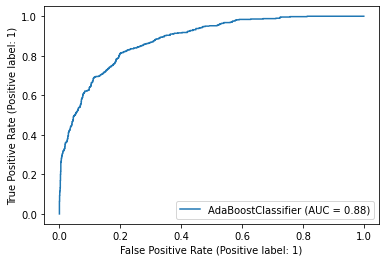

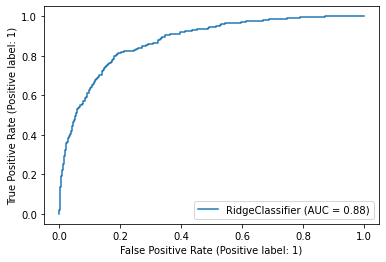

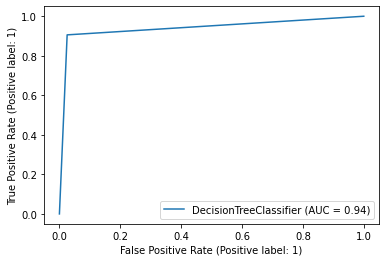

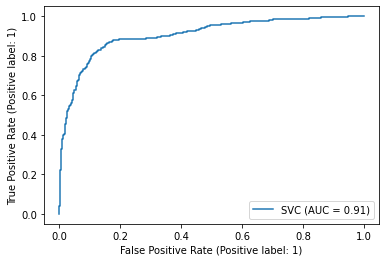

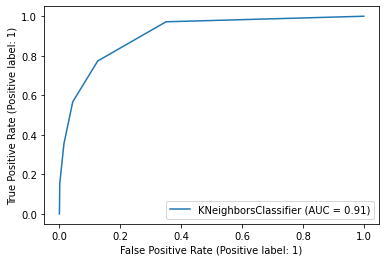

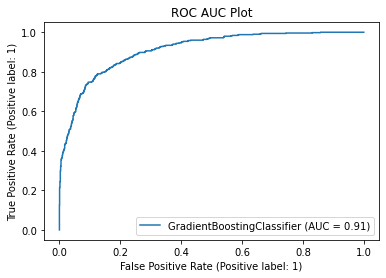

In [93]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(ADA_model,x_test,y_test)
plot_roc_curve(RD_model,x_test,y_test)
plot_roc_curve(DT_model,x_test,y_test)
plot_roc_curve(SV_model,x_test,y_test)
plot_roc_curve(KNR_model,x_test,y_test)
plot_roc_curve(GB_model,x_test,y_test)

plt.title('ROC AUC Plot')
plt.show()

In [94]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

decisiontreeclassifier gives us best accuracy score of the model

## saving model:

In [106]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(DT_model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))